In [11]:
%reload_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append("../src")

import feature_engineering as fe

path_to_df = "../data/raw/atp_tennis.csv"

In [12]:
df = fe.process_features(path_to_df)

In [13]:
# Define numeric columns

numeric_cols = df.select_dtypes(include=np.number).columns

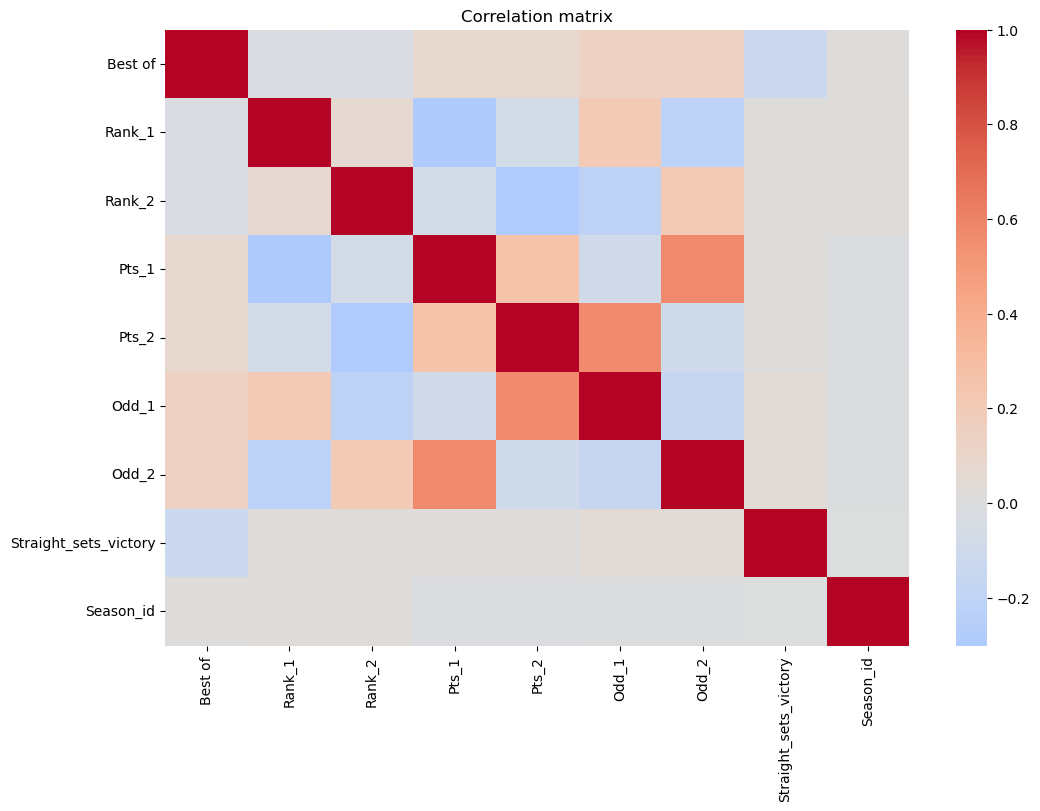

In [14]:
# Plot Correlation matrix

plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), cmap="coolwarm", center=0, annot=False)
plt.title("Correlation matrix")
plt.show()